# Feature Scaling
I have performed feature scaling on my 'customer_spending_features.csv'. Feature Scaling is done to ensure that all numerical variables contribute equally to the clustering process.  Standardization is used to prevent features with large numerical values to dominate the results. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  # used to scale features
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # for visualizing clusters by making 2D
import matplotlib.pyplot as plt

In [24]:
# Load the engineered customer-level dataset
customer_features = pd.read_csv("customer_spending_features.csv")

In [25]:
print(customer_features.head())

  customer_id  Total_Spending  Purchase_Frequency  Total_Quantity  \
0     C100004         7502.00                   1               5   
1     C100005         2400.68                   1               2   
2     C100006          322.56                   1               3   
3     C100012          130.75                   1               5   
4     C100019           35.84                   1               1   

   Avg_Spending   Age  
0       7502.00  61.0  
1       2400.68  34.0  
2        322.56  44.0  
3        130.75  25.0  
4         35.84  21.0  


In [26]:
# Select numerical features for clustering (exclude customer_id)
X = customer_features[["Age", "Total_Spending", "Purchase_Frequency", "Total_Quantity", "Avg_Spending"]]

In [27]:
print("Feature matrix shape:", X.shape)

Feature matrix shape: (99457, 5)


In [28]:
# Create a StandardScaler object
scaler = StandardScaler()

In [29]:
X_for_elbow = X.copy()

In [30]:
# Scale the selected data
X_scaled = scaler.fit_transform(X_for_elbow)

In [31]:
# List to store inertia values
inertia_values = []

# Range of K values to test
k_values = range(1, 6)

In [32]:
# Loop over K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

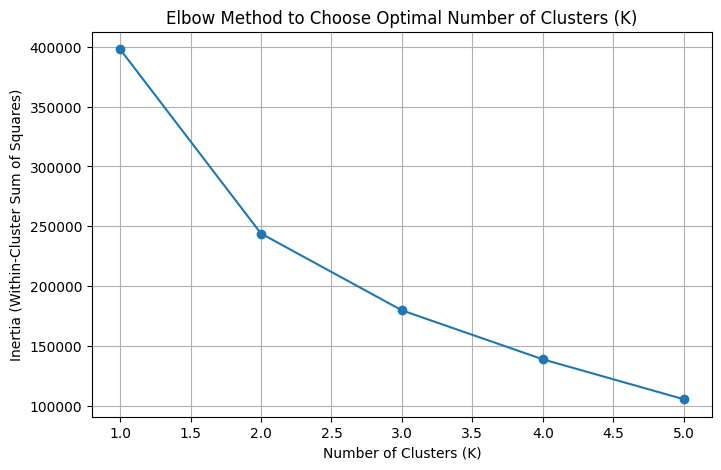

In [33]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), inertia_values, marker="o")
plt.title("Elbow Method to Choose Optimal Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# K-Means Clustering (K = 3)
The elbow method shows that the optimal number of clusters are 3 for this dataset. So In this step I have applied k mean algorithm with k = 3 to segment customers based on their spending behavior. 

Each customer is assigned to one of the three clusters, representing different purchasing patterns. These clusters label are added to the dataset and will later be used for visualizations. 

In [34]:
X = customer_features[["Age", "Total_Spending", "Purchase_Frequency", "Total_Quantity", "Avg_Spending"]]  # feature matrix

In [35]:
# Create a scaler object to standardize the features
scaler = StandardScaler()

In [36]:
X_scaled = scaler.fit_transform(X)  # scales all features so K-Means works fairly

In [ ]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10) # set k =3 

In [37]:
clusters = kmeans_final.fit_predict(X_scaled)  # fit the model for prediction

In [38]:
customer_features["Cluster"] = clusters  # stores cluster number (0/1/2) for each customer

In [ ]:
customer_features.head()  

,customer_id,Total_Spending,Purchase_Frequency,Total_Quantity,Avg_Spending,Age,Cluster
0,C100004,7502.00,1,5,7502.00,61.0,2
1,C100005,2400.68,1,2,2400.68,34.0,1
2,C100006,322.56,1,3,322.56,44.0,0
3,C100012,130.75,1,5,130.75,25.0,1
4,C100019,35.84,1,1,35.84,21.0,1


In [40]:
customer_features["Cluster"].value_counts()  # shows cluster sizes

Cluster
1    43079
0    42392
2    13986
Name: count, dtype: int64

In [41]:
# Calculate average values of each feature inside each cluster
cluster_summary = customer_features.groupby("Cluster")[["Age", "Total_Spending", "Purchase_Frequency", "Total_Quantity", "Avg_Spending"]].mean()  # cluster averages

# Display the summary table
cluster_summary  


,Age,Total_Spending,Purchase_Frequency,Total_Quantity,Avg_Spending
Cluster,,,,,
0,56.503468,1137.676869,1.0,2.732992,1137.676869
1,30.532231,1136.636443,1.0,2.738364,1136.636443
2,43.510296,11033.335842,1.0,4.639568,11033.335842


# PCA Visualization of Customer Segments

To visually analyze and validate the customer segments PCA is used to reduce the data into two dimensions while preserving the most important patterns in the data.

## Why PCA over t-SNE ?
PCA is chosen over t-SNE because it is faster, deterministic, and easier to interpret especially for large datasets. It also preserves the global structure of the data which aligns well with distance based algorithms like K-Means.

In [ ]:
pca = PCA(n_components=2)  # PCA object to reduce data to 2 components

In [ ]:
X_pca = pca.fit_transform(X_scaled)  # transforms 5D data into 2D

In [ ]:
# new DataFrame to store PCA results
pca_df = pd.DataFrame(X_pca, columns=["Principal Component 1", "Principal Component 2"])

In [43]:
pca_df["Cluster"] = customer_features["Cluster"]  # attach cluster info

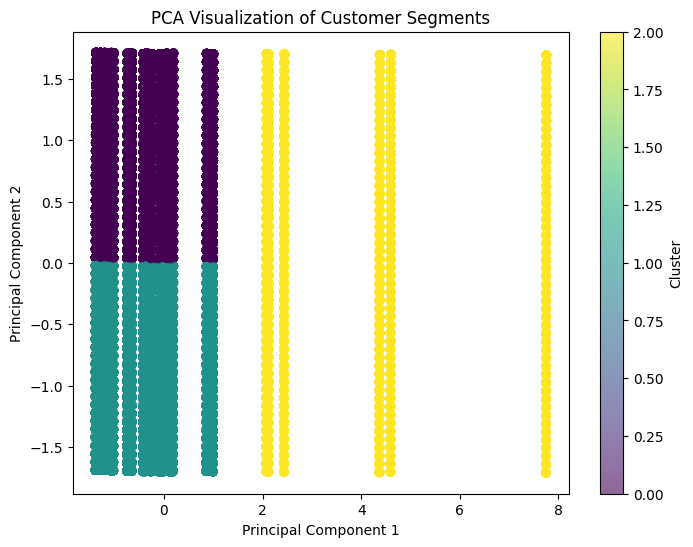

In [44]:
# Create a scatter plot for PCA visualization
plt.figure(figsize=(8, 6)) 

plt.scatter(pca_df["Principal Component 1"], pca_df["Principal Component 2"], c=pca_df["Cluster"], cmap="viridis", alpha=0.6)
plt.title("PCA Visualization of Customer Segments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

## PCA Results Summary 

The PCA visualization confirms that the K-Means clustering model has effectively segmented customers into three meaningful groups. One cluster is clearly separated from the others, indicating a distinct high-spending customer segment, while the remaining two clusters show partial overlap, which is expected in real-world behavioral data. Overall, the visualization validates that customer spending patterns differ across clusters and that the segmentation is suitable for further business interpretation and strategy development.

# Marketing Strategy Based on Customer Segmentation

After identifying and validating the customer clusters, the next step is to translate these insights into actionable marketing strategies. Each customer segment exhibits different spending behavior and demographic characteristics, which allows businesses to design targeted marketing approaches instead of applying a one-size-fits-all strategy. The following visualizations and explanations outline how marketing efforts can be optimized for each customer group.

# Strategy 1: Marketing Channel Allocation by Customer Cluster

This strategy focuses on selecting the most effective communication channels for each customer segment based on their age profile and spending behavior. The visualization highlights how different clusters require varying levels of emphasis across digital marketing, loyalty programs, discount campaigns, and personalized engagement.

Customers in Cluster 1, who are generally younger and low spenders, are best targeted through digital and social media marketing, as they are more responsive to online promotions and trend-based campaigns.
Cluster 0, consisting of relatively older and cautious spenders, benefits more from loyalty programs and trust-based communication, such as email campaigns and long-term value offers.
In contrast, Cluster 2, the high-spending customer group, requires VIP and personalized marketing channels, where exclusivity, premium support, and direct engagement play a crucial role in retention.

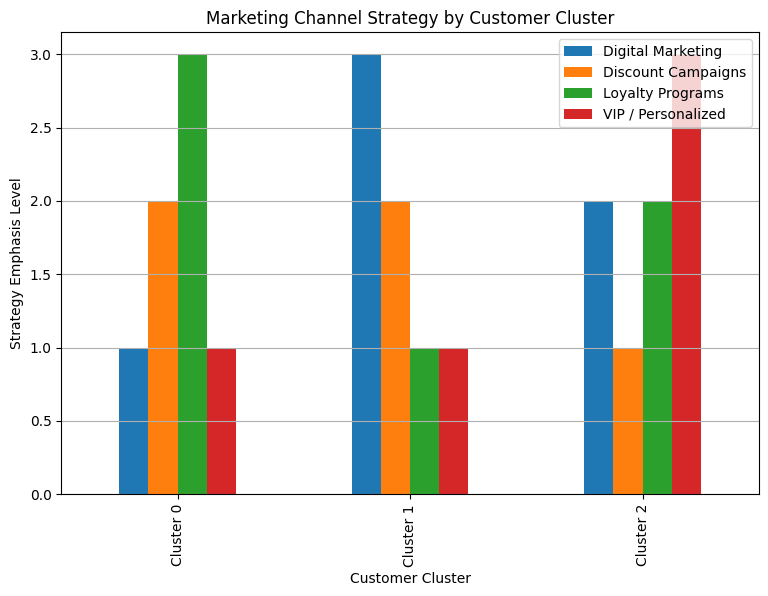

In [45]:
# Manually define marketing channel scores for visualization
channels = {
    "Digital Marketing": [1, 3, 2],
    "Discount Campaigns": [2, 2, 1],
    "Loyalty Programs": [3, 1, 2],
    "VIP / Personalized": [1, 1, 3]
}

# Convert to DataFrame
channel_df = pd.DataFrame(channels, index=["Cluster 0", "Cluster 1", "Cluster 2"])

# Plot stacked bar chart
channel_df.plot(kind="bar", figsize=(9, 6))

# Add titles and labels
plt.title("Marketing Channel Strategy by Customer Cluster")
plt.xlabel("Customer Cluster")
plt.ylabel("Strategy Emphasis Level")

# Show grid
plt.grid(axis="y")

# Display plot
plt.show()


# Strategy 2: Promotional Offer Strategy by Customer Segment

This strategy focuses on determining the type of promotional offers most suitable for each cluster. The visualization clearly differentiates between discount-based, bundle-based, and exclusive offers across customer segments.

For Cluster 0, discount-oriented promotions and value deals are more effective, as these customers are price-sensitive and prefer cost-saving benefits.
Cluster 1 responds well to bundled offers and engagement-driven promotions, which encourage repeat interaction without heavy discounts.
On the other hand, Cluster 2 customers are less price-sensitive and place greater value on exclusive offers, such as early access, premium memberships, and personalized recommendations, making exclusivity more impactful than discounts.

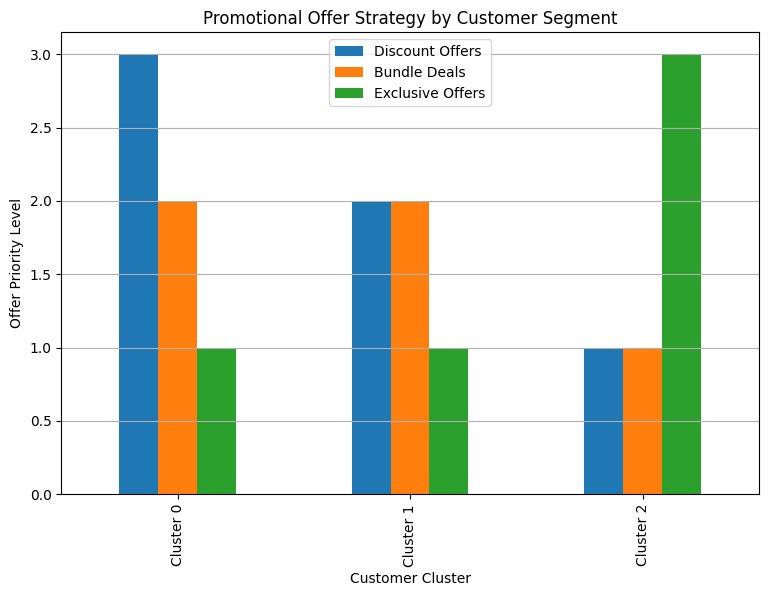

In [46]:
# Define offer strategy levels
offers = {
    "Discount Offers": [3, 2, 1],
    "Bundle Deals": [2, 2, 1],
    "Exclusive Offers": [1, 1, 3]
}

# Convert to DataFrame
offer_df = pd.DataFrame(offers, index=["Cluster 0", "Cluster 1", "Cluster 2"])

# Plot bar chart
offer_df.plot(kind="bar", figsize=(9, 6))

# Add titles and labels
plt.title("Promotional Offer Strategy by Customer Segment")
plt.xlabel("Customer Cluster")
plt.ylabel("Offer Priority Level")

# Show grid
plt.grid(axis="y")

# Display plot
plt.show()


# Final Conclusion and Task Completion

Through this project, customers were successfully segmented using unsupervised learning techniques, specifically K-Means clustering, based on real spending behavior. PCA visualization validated the effectiveness of the clustering, while strategy-driven visualizations translated technical insights into practical business actions.

Additional strategies such as personalized email campaigns, seasonal promotions, and customer retention programs can further enhance marketing effectiveness when applied selectively to each segment.

Overall, all objectives of the task have been fulfilled, including exploratory data analysis, customer segmentation, dimensionality reduction, and the development of data-driven marketing strategies, resulting in a complete and well-structured customer segmentation solution.